In [115]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import Lasso

In [116]:
class Regression:
    def __init__(self, lr, itr, regularization):
        """
        learning_rate: A small value needed for gradient decent, default value id 0.1
        iteration: Number of training iteration, default value is 10,000
        """
        self.m = None # number of training samples
        self.n = None # number of features
        self.w = None # weights
        self.b = None # bias
        # will be the l1/l2 regularization class according to the regression model Lasso or ridge
        self.regularization = regularization
        self.lr = lr
        self.itr = itr

    def cost_function(self, y, y_pred):
        """
        y: Original target value
        y_pred: predicted target value
        """
        return (1 / (2*self.m)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)

    def hypothesis(self, w, b, X):
        """
        weights: parameter value weight
        X: Training samples
        b: bias
        """
        return np.dot(X, w)

    def train(self, X, y):
        """
        X: training data feature values ---> N Dimentional vector
        y: training data target value -----> 1 Dimentional array
        """
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)

        # Target value should be in the shape of (n, 1)
        # So, this will check that and change the shape to (n, 1), if not
        try:
            y.shape[1]
        except IndexError as e:
            # we need to change it to the 1 D array, not a list
            print("ERROR: Target array should be a one dimentional array not a list"
                  "----> here the target value not in the shape of (n,1). \nShape ({shape_y_0},1) and {shape_y} not match"
                  .format(shape_y_0=y.shape[0], shape_y=y.shape))
            return

        self.m = X.shape[0]

        self.n = X.shape[1]

        # initial weight
        self.w = np.zeros((self.n, 1))

        # bias
        self.b = 0

        for it in range(1, self.itr+1):
            '''
            # 1. Find the predicted value through the hypothesis
            # 2. Find the Cost function value
            # 3. Find the derivation of weights
            # 4. Apply Gradient Decent
            '''
            y_pred = self.hypothesis(self.w, self.b, X)
            # print("iteration",it) # debugging
            # print("y predict value", y_pred)  # debugging
            cost = self.cost_function(y, y_pred)
            # print("Cost function", cost)  # debugging
            # find the derivative
            dw = (1/self.m) * np.dot(X.T, (y_pred - y)) + \
                self.regularization.derivation(self.w)
            # print("weights derivation", dw)  # debugging
            # db = -(2 / self.m) * np.sum((y_pred - y)) # bias derivation

            # change the weight parameter.
            self.w = self.w - self.lr * dw
            # print("updated weights",self.w) # debugging
            # self.b = self.b - self.lr * db # change the bias parameter

            # if it % 10 == 0: # print cost value every 10 iteration
            #     print(
            #         "The Cost function for the iteration {}----->{} :)".format(it, cost))

    def predict(self, test_X):
        """
        :param test_X: feature values to predict
        """
        # Insert constant ones for bias weights
        test_X = np.insert(test_X, 0, 1, axis=1)

        y_pred = self.hypothesis(self.w, self.b, test_X)
        return y_pred

In [117]:
# Create the regularization class we want.
class l1_regularization:
    """Regularization used for Lasson Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, w):
        return self.lamda * np.sum(np.abs(w))

    def derivation(self, w):
        "Derivation of the regularization function"
        return self.lamda * np.sign(w)  # the sign function returns (-1 if x < 0, 0 if x==0, 1 if x > 0) taken from numpy documentation

In [118]:
class LassoRegression(Regression):
    """
    Lasso Regression is one of the variance of the Linear Regression. This model doing the parameter learning
    and regularization at the same time. This model uses the l1-regularization.
    * Regularization will be one of the soluions to the Overfitting.
    * Overfitting happens when the model has "High Variance and low bias". So, regularization adds a little bias to the model.
    * This model will try to keep the balance between learning the parameters and the complexity of the model( tries to keep the parameter having small value and small degree of polynomial).
    * The Regularization parameter(lamda) controls how severe  the regularization is.
    * large lamda adds more bias , hence the Variance will go very small --> this may cause underfitting(Low bias and High Varinace).
    * Lamda can be found by trial and error methos.
    """

    def __init__(self, lamda, lr, itr):
        """
        lamda: Regularization factor.
        learning_rate: A samll value needed for gradient decent, default value id 0.1
        iteration: Number of training iteration, default value is 10,000
        """
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(
            lr, itr, self.regularization)

    def train(self, X, y):
        """
        X: training data feature values ---> N Dimentional vector
        y: training data target value -----> 1 Dimentional array
        """
        return super(LassoRegression, self).train(X, y)

    def predict(self, test_X):
        """
        test_X: Value need to be predicted
        """
        return super(LassoRegression, self).predict(test_X)

In [119]:
# importing iris dataset
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target
y = y[:, np.newaxis]

In [120]:
print("="*100)
print("Number of training data samples-----> {}".format(X.shape[0]))
print("Number of training features --------> {}".format(X.shape[1]))
print("Shape of the target value ----------> {}".format(y.shape))

Number of training data samples-----> 150
Number of training features --------> 4
Shape of the target value ----------> (150, 1)


In [121]:
# Split the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

model = LassoRegression(lamda=0.01, lr=0.01, itr=100)


# Train
model.train(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
print(y_pred.flatten())

[ 1.34766132  0.13326073  2.24400344  1.32072796  1.40849077  0.13016303
  1.00169544  1.61486147  1.39655153  1.10310932  1.55790277  0.09679454
  0.02267831  0.11749315  0.07173733  1.35568741  1.83643506  1.10999561
  1.30117179  1.79458933  0.15546814  1.48554079  0.16406423  1.77865845
  1.90325686  1.65882575  1.82661498  1.86120747  0.12865628  0.16597972
 -0.08056687  0.01921672  1.24763024  0.13309948  0.06049205  1.58748227
  1.28605372  0.0882382   0.04606792  0.00654684  1.5999118   1.28185843
  1.3598827   0.01114823  0.06542104  1.04125892  1.52298573  1.66587839
  1.25903882  1.91164929]


In [122]:
# using lasso regression from sklearn
from sklearn.linear_model import Lasso
model = Lasso(alpha=0.01, max_iter=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(y_pred)

[ 1.24483889  0.03761411  2.2715246   1.33405184  1.33694778  0.05370715
  1.02268739  1.82279194  1.34358547  1.05119935  1.69602325 -0.07898228
 -0.09769492 -0.05934532  0.00884577  1.41111792  1.97583097  1.0172658
  1.25493292  1.93269844  0.01844701  1.5713074   0.09510153  1.88611888
  1.96469601  1.85893351  1.79411754  2.03186589  0.01417685  0.01705282
 -0.14331182  0.0174873   1.22957329  0.0096596  -0.04785709  1.64845175
  1.31122422 -0.03419918 -0.05490635 -0.09556517  1.68877592  1.36830938
  1.35403276 -0.01053481 -0.04684519  0.9250893   1.48070026  1.713027
  1.2358963   2.15165293]


In [123]:
# --- Custom Cross-validation Code for Custom Lasso Regression ---
lambdas = [0.001, 0.01, 0.1, 1, 10]
k_folds = 5  # Number of folds for cross-validation
lambda_mse_scores = {}

for lamda in lambdas:
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
    mse_scores = []

    for train_index, val_index in kf.split(X_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        model = LassoRegression(lamda=lamda, lr=0.01, itr=100)
        model.train(X_train_fold, y_train_fold)

        y_val_pred = model.predict(X_val_fold)
        mse = np.mean((y_val_pred - y_val_fold) ** 2)
        mse_scores.append(mse)

    lambda_mse_scores[lamda] = np.mean(mse_scores)

best_lambda = min(lambda_mse_scores, key=lambda x: lambda_mse_scores[x])
print(f"Best Lambda from Cross-Validation: {best_lambda}")

Best Lambda from Cross-Validation: 0.001


In [124]:
# Train the final custom Lasso model with the best lambda
final_custom_model = LassoRegression(lamda=best_lambda, lr=0.01, itr=100)
final_custom_model.train(X_train, y_train)
final_custom_y_pred = final_custom_model.predict(X_test)

# --- Scikit-learn Lasso Model with Cross-Validation ---
param_grid = {'alpha': lambdas}
grid_search = GridSearchCV(
    Lasso(max_iter=1000), param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f"Best Alpha from Scikit-learn GridSearchCV: {best_alpha}")

final_sklearn_model = Lasso(alpha=best_alpha, max_iter=1000)
final_sklearn_model.fit(X_train, y_train)
final_sklearn_y_pred = final_sklearn_model.predict(X_test)

Best Alpha from Scikit-learn GridSearchCV: 0.001


In [125]:
# --- Calculate Mean Squared Errors ---
mse_custom = np.mean((final_custom_y_pred - y_test) ** 2)
mse_sklearn = np.mean((final_sklearn_y_pred - y_test) ** 2)
mse_cross_val_best = lambda_mse_scores[best_lambda]

print(f"MSE (Custom Lasso): {mse_custom}")
print(f"MSE (Scikit-learn Lasso): {mse_sklearn}")
print(f"MSE (Cross-Validated Best Lambda): {mse_cross_val_best}")

MSE (Custom Lasso): 0.05970272056103791
MSE (Scikit-learn Lasso): 1.3783554416085813
MSE (Cross-Validated Best Lambda): 0.06797912903121281


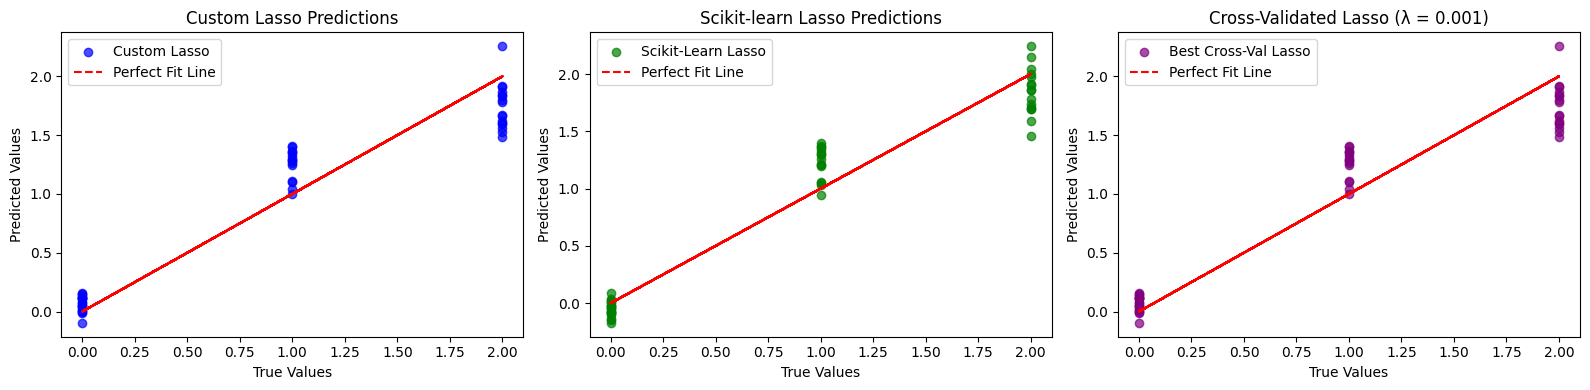

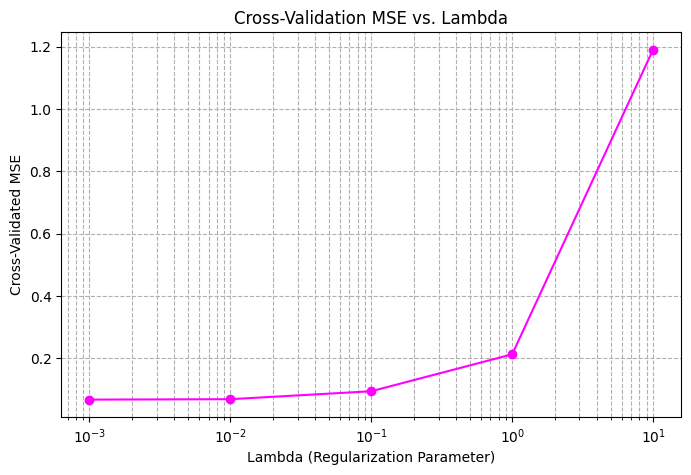

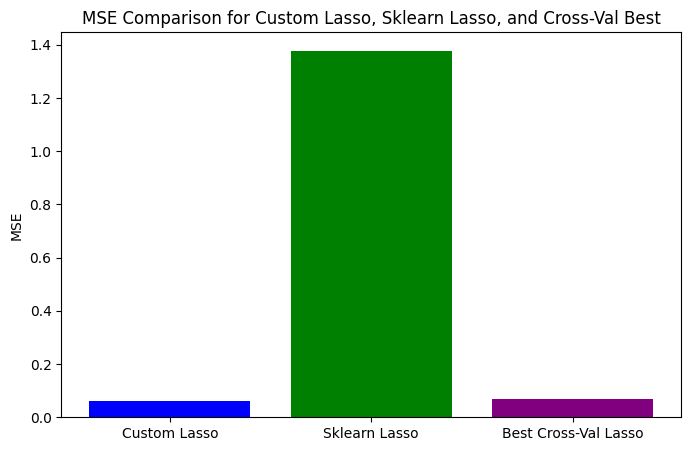

In [126]:
# --- Plot 1: Predictions vs. True Values ---
plt.figure(figsize=(16, 4))

# Custom Lasso Predictions
plt.subplot(1, 3, 1)
plt.scatter(y_test, final_custom_y_pred, color='blue',
            label='Custom Lasso', alpha=0.7)
plt.plot(y_test, y_test, color='red',
         linestyle='dashed', label='Perfect Fit Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Custom Lasso Predictions')
plt.legend()

# Scikit-learn Lasso Predictions
plt.subplot(1, 3, 2)
plt.scatter(y_test, final_sklearn_y_pred, color='green',
            label='Scikit-Learn Lasso', alpha=0.7)
plt.plot(y_test, y_test, color='red',
         linestyle='dashed', label='Perfect Fit Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scikit-learn Lasso Predictions')
plt.legend()

# Final Cross-Validated Lasso Predictions
plt.subplot(1, 3, 3)
plt.scatter(y_test, final_custom_y_pred, color='purple',
            label='Best Cross-Val Lasso', alpha=0.7)
plt.plot(y_test, y_test, color='red',
         linestyle='dashed', label='Perfect Fit Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'Cross-Validated Lasso (λ = {best_lambda})')
plt.legend()

plt.tight_layout()
plt.show()

# --- Plot 2: MSE vs. Lambda ---
plt.figure(figsize=(8, 5))
plt.plot(list(lambda_mse_scores.keys()), list(
    lambda_mse_scores.values()), marker='o', color='magenta')
plt.xlabel('Lambda (Regularization Parameter)')
plt.ylabel('Cross-Validated MSE')
plt.title('Cross-Validation MSE vs. Lambda')
plt.xscale('log')
plt.grid(True, linestyle='--', which='both')
plt.show()

# --- Plot 3: MSE Comparison (Custom vs. Sklearn vs. Cross-Val) ---
mse_values = [mse_custom, mse_sklearn, mse_cross_val_best]
mse_labels = ['Custom Lasso', 'Sklearn Lasso', 'Best Cross-Val Lasso']

plt.figure(figsize=(8, 5))
plt.bar(mse_labels, mse_values, color=['blue', 'green', 'purple'])
plt.ylabel('MSE')
plt.title('MSE Comparison for Custom Lasso, Sklearn Lasso, and Cross-Val Best')
plt.show()